## Charts

In [1]:
import nltk
from nltk import CFG, ChartParser

grammar = CFG.fromstring('''
  NP  -> NNS | JJ NNS | NP CC NP
  NNS -> "cats" | "dogs" | "mice" | NNS CC NNS 
  JJ  -> "big" | "small"
  CC  -> "and" | "or"
  ''')

sent = ['small', 'cats', 'and', 'mice']

parser = ChartParser(grammar)
parse = parser.parse(sent)

In [2]:
ts = []
for t in parse:
    ts.append(t)
print('number of trees:', len(ts))

number of trees: 2


(NP (JJ small) (NNS (NNS cats) (CC and) (NNS mice)))


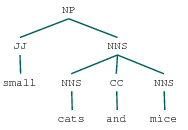

In [3]:
print(ts[0])
ts[0] 

(NP (NP (JJ small) (NNS cats)) (CC and) (NP (NNS mice)))


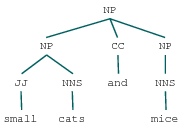

In [4]:
print(ts[1])
ts[1]

In [5]:
# achieve the list of applied edges
parse = parser.chart_parse(['small', 'cats', 'and', 'mice'])
print("TD num edges = ",parse.num_edges())

TD num edges =  28


In [6]:
parse.edges()

[[Edge: [0:1] 'small'],
 [Edge: [1:2] 'cats'],
 [Edge: [2:3] 'and'],
 [Edge: [3:4] 'mice'],
 [Edge: [0:1] JJ -> 'small' *],
 [Edge: [0:1] NP -> JJ * NNS],
 [Edge: [1:2] NNS -> 'cats' *],
 [Edge: [1:2] NP -> NNS *],
 [Edge: [1:2] NNS -> NNS * CC NNS],
 [Edge: [0:2] NP -> JJ NNS *],
 [Edge: [0:2] NP -> NP * CC NP],
 [Edge: [1:2] NP -> NP * CC NP],
 [Edge: [2:3] CC -> 'and' *],
 [Edge: [1:3] NNS -> NNS CC * NNS],
 [Edge: [0:3] NP -> NP CC * NP],
 [Edge: [1:3] NP -> NP CC * NP],
 [Edge: [3:4] NNS -> 'mice' *],
 [Edge: [3:4] NP -> NNS *],
 [Edge: [3:4] NNS -> NNS * CC NNS],
 [Edge: [1:4] NNS -> NNS CC NNS *],
 [Edge: [1:4] NP -> NNS *],
 [Edge: [1:4] NNS -> NNS * CC NNS],
 [Edge: [0:4] NP -> JJ NNS *],
 [Edge: [0:4] NP -> NP * CC NP],
 [Edge: [1:4] NP -> NP * CC NP],
 [Edge: [3:4] NP -> NP * CC NP],
 [Edge: [0:4] NP -> NP CC NP *],
 [Edge: [1:4] NP -> NP CC NP *]]

In [7]:
from nltk import TopDownChartParser

parser = nltk.TopDownChartParser(grammar)
parse = parser.parse(sent)
ts = []
for t in parse:
    ts.append(t)
len(ts)

2

(NP (JJ small) (NNS (NNS cats) (CC and) (NNS mice)))


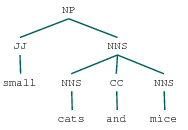

In [8]:
print(ts[0])
ts[0] 

(NP (NP (JJ small) (NNS cats)) (CC and) (NP (NNS mice)))


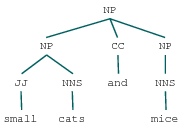

In [9]:
print(ts[1])
ts[1]